# MSA 2025 Phase 2 - Part 1

In [2]:
# import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [13]:
# Filepaths for W store and X store datasets
x_filepath = '/workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/X store sales/'
x_sales = x_filepath + 'store_sales.csv'

w_filepath ='/workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/W store sales/'
w_sales = w_filepath + 'sales.csv'
w_stores = w_filepath + 'stores.csv'
w_features = w_filepath + 'features.csv'


### 1.1 Raw X Store Info

In [14]:
df_x = pd.read_csv(x_sales, encoding='latin1')
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [15]:
print("-- Raw X Rows and Columns Info --")
print(df_x.info())

-- Raw X Rows and Columns Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          212

In [16]:
print("\n\n--- Checking Numerical Columns for Logical Anomalies ---")
print(df_x[['Sales', 'Quantity', 'Discount', 'Profit']].describe())



--- Checking Numerical Columns for Logical Anomalies ---
             Sales     Quantity     Discount       Profit
count  2121.000000  2121.000000  2121.000000  2121.000000
mean    349.834887     3.785007     0.173923     8.699327
std     503.179145     2.251620     0.181547   136.049246
min       1.892000     1.000000     0.000000 -1862.312400
25%      47.040000     2.000000     0.000000   -12.849000
50%     182.220000     3.000000     0.200000     7.774800
75%     435.168000     5.000000     0.300000    33.726600
max    4416.174000    14.000000     0.700000  1013.127000


### 1.2 Raw W Store Info 

In [5]:
df_w_sales = pd.read_csv(w_sales)
df_w_stores = pd.read_csv(w_stores)
df_w_features = pd.read_csv(w_features)

# Display the first few rows of each DataFrame
print("W Store Sales DataFrame:")
print(df_w_sales.head())
print("\nW Store Stores DataFrame:")
print(df_w_stores.head())
print("\nW Store Features DataFrame:")
print(df_w_features.head())

W Store Sales DataFrame:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

W Store Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

W Store Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  

In [6]:
print("-- Raw W Rows and Columns Info --")
print("W Store Sales DataFrame:")
print(df_w_sales.info())
print("\nW Store Stores DataFrame:")
print(df_w_stores.info())
print("\nW Store Features DataFrame:")
print(df_w_features.info())

-- Raw W Rows and Columns Info --
W Store Sales DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

W Store Stores DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None

W Store Features DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819

In [7]:
# merge W store sales with stores and features
df_w_merged = df_w_sales.merge(df_w_features, on=['Store', 'Date'], how='left') \
                        #  .merge(df_w_features, on='Date', how='left')

# Display the first few rows of the merged DataFrame
print("\nMerged W Store DataFrame:")
print(df_w_merged.head())


Merged W Store DataFrame:
   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y  
0  211.096358         8.106        False  
1  211.242170         8.106      

In [8]:
print(df_w_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 42.6+ MB
None


In [9]:
# merge W store sales with stores
df_w_final = df_w_merged.merge(df_w_stores, on='Store', how='left')
# Display the first few rows of the final merged DataFrame
print("\nFinal Merged W Store DataFrame:")
print(df_w_final.head())


Final Merged W Store DataFrame:
   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1

In [10]:
print(df_w_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [11]:
# Change the 'Date' column to datetime format
df_w_final['Date'] = pd.to_datetime(df_w_final['Date'])
# Check is the 'Date' column is in datetime format
print("\nDate column type after conversion:")
print(df_w_final['Date'].dtype)
# Check for missing values in the final merged DataFrame
print("\nMissing values in the final merged W Store DataFrame:")
print(df_w_final.isnull().sum())


Date column type after conversion:
datetime64[ns]

Missing values in the final merged W Store DataFrame:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


## 2. Clean data

### 2.1 W Store Sales Date Clean Steps

In [ ]:
# Pre-check: Verify if the two holiday columns are identical.
are_holidays_identical = (df_w_final['IsHoliday_x'] == df_w_final['IsHoliday_y']).all()
print(f"\nAre 'IsHoliday_x' and 'IsHoliday_y' identical? {are_holidays_identical}")

if are_holidays_identical:
    # Action: Drop the redundant 'IsHoliday_y' column.
    # The 'inplace=True' argument modifies the DataFrame directly.
    df_w_final.drop(columns=['IsHoliday_y'], inplace=True)
    
    # Action: Rename 'IsHoliday_x' to a more intuitive name, 'IsHoliday'.
    df_w_final.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
    
    print("Cleaned up redundant 'IsHoliday' columns.")
else:
    # If they are not identical, it alerts the user.
    print("Warning: 'IsHoliday' columns are not identical and require manual investigation!")

# Post-check: Display the new column names to confirm the change.
print("Current columns:", df_w_final.columns)


Are 'IsHoliday_x' and 'IsHoliday_y' identical? True
Cleaned up redundant 'IsHoliday' columns.
Current columns: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


In [14]:
# Pre-check: Calculate the percentage of missing values for each MarkDown column.
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
missing_percentage = df_w_final[markdown_cols].isnull().sum() / len(df_w_final) * 100
print(f"\nMissing value percentage for MarkDown columns:\n{missing_percentage}")

# Action: Fill NaN values in all MarkDown columns with 0.
df_w_final[markdown_cols] = df_w_final[markdown_cols].fillna(0)

# Post-check: Verify that there are no more missing values in these columns.
print("\nMissing values count after filling with 0:")
print(df_w_final[markdown_cols].isnull().sum())


Missing value percentage for MarkDown columns:
MarkDown1    64.257181
MarkDown2    73.611025
MarkDown3    67.480845
MarkDown4    67.984676
MarkDown5    64.079038
dtype: float64

Missing values count after filling with 0:
MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


In [ ]:
# Check another column 
columns_to_check = [
    'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size'
]
df_check = df_w_final[columns_to_check].copy()

# --- Identifier Columns Check (Store, Dept) ---
# Purpose: Ensure identifiers are within expected ranges and are positive integers.
print("\n--- Identifier Columns ---")
print(f"Store: Unique values = {df_check['Store'].nunique()}, Min = {df_check['Store'].min()}, Max = {df_check['Store'].max()}")
print(f"Dept: Unique values = {df_check['Dept'].nunique()}, Min = {df_check['Dept'].min()}, Max = {df_check['Dept'].max()}")



--- Identifier Columns ---
Store: Unique values = 45, Min = 1, Max = 45
Dept: Unique values = 81, Min = 1, Max = 99


In [ ]:
# --- Target Variable Check (Weekly_Sales) ---
print("\n--- Target Variable (Weekly_Sales) ---")
print(df_check['Weekly_Sales'].describe())


--- Target Variable (Weekly_Sales) ---
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


In [28]:
# Count rows where sales are negative.
negative_sales_count = (df_check['Weekly_Sales'] < 0).sum()
print(f"Number of rows with negative Weekly_Sales: {negative_sales_count}")
if negative_sales_count > 0:
    print("INFO: Negative sales values likely represent customer returns exceeding sales for that week.")
    print("      This is a valid business scenario, not necessarily a data error.")

Number of rows with negative Weekly_Sales: 1285
INFO: Negative sales values likely represent customer returns exceeding sales for that week.
      This is a valid business scenario, not necessarily a data error.


In [29]:
# --- Descriptive Numerical Features Check ---
print("\n--- Descriptive Numerical Features ---")
print(df_check[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].describe())
print("INFO: Check for logical consistency (e.g., positive prices, reasonable temperature ranges).")


--- Descriptive Numerical Features ---
         Temperature     Fuel_Price            CPI   Unemployment  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027     171.201947       7.960289   
std        18.447931       0.458515      39.159276       1.863296   
min        -2.060000       2.472000     126.064000       3.879000   
25%        46.680000       2.933000     132.022667       6.891000   
50%        62.090000       3.452000     182.318780       7.866000   
75%        74.280000       3.738000     212.416993       8.572000   
max       100.140000       4.468000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000  
INFO: Check for logical consistency (e.g., positive prices, reasonable temperature ranges).


In [30]:
# --- Categorical and Boolean Features Check ---
print("\n--- Categorical and Boolean Features ---")
print(f"IsHoliday: Unique values = {df_check['IsHoliday'].nunique()}, Values = {df_check['IsHoliday'].unique()}")
print(f"Type: Unique values = {df_check['Type'].unique()}")   


--- Categorical and Boolean Features ---
IsHoliday: Unique values = 2, Values = [False  True]
Type: Unique values = ['A' 'B' 'C']


In [32]:
# --- Date Feature Check ---
print("\n--- Date Feature ---")
print(f"Date range: {df_check['Date'].min()} to {df_check['Date'].max()}")



--- Date Feature ---
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


### 2.2 X Store Sales Data Clean Steps

In [23]:
# Convert date columns from object to datetime
df_x['Order Date'] = pd.to_datetime(df_x['Order Date'])
df_x['Ship Date'] = pd.to_datetime(df_x['Ship Date'])

# Bonus: Create a new feature for shipping time, which is often useful
df_x['Shipping Days'] = (df_x['Ship Date'] - df_x['Order Date']).dt.days

print("Date columns converted. 'Shipping Days' feature created.")
# Verify the change
df_x.info()

Date columns converted. 'Shipping Days' feature created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       

In [18]:
# Use Data Wrangler to validate the data
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5


In [32]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_x):
    # Drop duplicate rows based on 'Order ID' and 'Product ID'
    df_x = df_x.drop_duplicates(subset=['Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit'], keep='first')
    return df_x

df_x_clean = clean_data(df_x.copy())
df_x_clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5


In [33]:
df_x_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120 entries, 0 to 2120
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2120 non-null   int64         
 1   Order ID       2120 non-null   object        
 2   Order Date     2120 non-null   datetime64[ns]
 3   Ship Date      2120 non-null   datetime64[ns]
 4   Ship Mode      2120 non-null   object        
 5   Customer ID    2120 non-null   object        
 6   Customer Name  2120 non-null   object        
 7   Segment        2120 non-null   object        
 8   Country        2120 non-null   object        
 9   City           2120 non-null   object        
 10  State          2120 non-null   object        
 11  Postal Code    2120 non-null   int64         
 12  Region         2120 non-null   object        
 13  Product ID     2120 non-null   object        
 14  Category       2120 non-null   object        
 15  Sub-Category   2120 non-nu

In [26]:
# Group by Product ID and count the number of unique Product Names for each.
id_to_name_counts = df_x.groupby('Product ID')['Product Name'].nunique()

# Filter to find any IDs that are associated with more than one name.
problematic_ids = id_to_name_counts[id_to_name_counts > 1]

if problematic_ids.empty:
    print("✅ SUCCESS: Each Product ID maps to exactly one Product Name.")
else:
    print(f"🚨 WARNING: Found {len(problematic_ids)} Product IDs linked to multiple names.")
    print("These IDs need to be investigated:")
    print(problematic_ids)
    
    # To see the actual conflicting names, let's display the rows from the original data
    print("\n--- Example Conflicting Rows ---")
    conflicting_data = df_x[df_x['Product ID'].isin(problematic_ids.index)]
    print(conflicting_data[['Product ID', 'Product Name']].sort_values(by='Product ID'))


# Check for Many IDs -> One Name (Less critical, but good to know)
name_to_id_counts = df_x.groupby('Product Name')['Product ID'].nunique()
problematic_names = name_to_id_counts[name_to_id_counts > 1]

if problematic_names.empty:
    print("\n✅ SUCCESS: Each Product Name maps to exactly one Product ID.")
else:
    print(f"\n🚨 WARNING: Found {len(problematic_names)} Product Names linked to multiple IDs.")
    print("This could be due to different product versions or data entry errors.")
    # Display the first 5 problematic names as an example
    print(problematic_names.head())

🚨 WARNING: Found 8 Product IDs linked to multiple names.
These IDs need to be investigated:
Product ID
FUR-BO-10002213    2
FUR-CH-10001146    2
FUR-FU-10001473    2
FUR-FU-10004017    2
FUR-FU-10004091    2
FUR-FU-10004270    2
FUR-FU-10004848    2
FUR-FU-10004864    2
Name: Product Name, dtype: int64

--- Example Conflicting Rows ---
           Product ID                                       Product Name
512   FUR-BO-10002213   Sauder Forest Hills Library, Woodland Oak Finish
1233  FUR-BO-10002213              DMI Eclipse Executive Suite Bookcases
1365  FUR-BO-10002213              DMI Eclipse Executive Suite Bookcases
436   FUR-BO-10002213              DMI Eclipse Executive Suite Bookcases
1994  FUR-BO-10002213              DMI Eclipse Executive Suite Bookcases
...               ...                                                ...
1271  FUR-FU-10004864  Howard Miller 14-1/2" Diameter Chrome Round Wa...
1282  FUR-FU-10004864  Howard Miller 14-1/2" Diameter Chrome Round Wa...
1354 

In [28]:
# Initialize an empty dictionary to store our corrections.
id_to_canonical_name_map = {}

# Loop through each problematic Product ID.
for prod_id in problematic_ids.index:
    # For the current ID, find the most frequent Product Name.
    # .value_counts() counts occurrences, .index[0] gets the most frequent one.
    correct_name = df_x[df_x['Product ID'] == prod_id]['Product Name'].value_counts().index[0]
    
    # Store this correction in our map.
    id_to_canonical_name_map[prod_id] = correct_name

print("--- Correction Map ---")
print("This map will be used to standardize the names:")
print(id_to_canonical_name_map)

--- Correction Map ---
This map will be used to standardize the names:
{'FUR-BO-10002213': 'DMI Eclipse Executive Suite Bookcases', 'FUR-CH-10001146': "Global Value Mid-Back Manager's Chair, Gray", 'FUR-FU-10001473': 'DAX Wood Document Frame', 'FUR-FU-10004017': 'Tenex Contemporary Contur Chairmats for Low and Medium Pile Carpet, Computer, 39" x 49"', 'FUR-FU-10004091': 'Howard Miller 13" Diameter Goldtone Round Wall Clock', 'FUR-FU-10004270': 'Eldon Image Series Desk Accessories, Burgundy', 'FUR-FU-10004848': 'Howard Miller 13-3/4" Diameter Brushed Chrome Round Wall Clock', 'FUR-FU-10004864': 'Howard Miller 14-1/2" Diameter Chrome Round Wall Clock'}


In [29]:
# --- Apply the correction map to the DataFrame ---
corrected_names = df_x['Product ID'].map(id_to_canonical_name_map)
df_x['Product Name'] = corrected_names.fillna(df_x['Product Name'])

print("\nProduct Names have been standardized based on the most frequent name for each ID.")


Product Names have been standardized based on the most frequent name for each ID.


In [ ]:
# --- Verify that the issue is resolved ---
print("\n--- Running verification check again ---")
id_to_name_counts_after_fix = df_x.groupby('Product ID')['Product Name'].nunique()
problematic_ids_after_fix = id_to_name_counts_after_fix[id_to_name_counts_after_fix > 1]

if problematic_ids_after_fix.empty:
    print("✅ SUCCESS! All Product IDs now map to a single, unique Product Name.")
else:
    print("🚨 ERROR: The issue persists. Further investigation is needed.")


--- Running verification check again ---
✅ SUCCESS! All Product IDs now map to a single, unique Product Name.


In [27]:
# Check for One ID -> Many Names
customer_id_to_name_counts = df_x.groupby('Customer ID')['Customer Name'].nunique()
problematic_customer_ids = customer_id_to_name_counts[customer_id_to_name_counts > 1]

if problematic_customer_ids.empty:
    print("✅ SUCCESS: Each Customer ID maps to exactly one Customer Name.")
else:
    print(f"🚨 WARNING: Found {len(problematic_customer_ids)} Customer IDs linked to multiple names.")
    print("Investigate these Customer IDs:")
    print(problematic_customer_ids)
    
    # Display examples of conflicting customer data
    print("\n--- Example Conflicting Customer Rows ---")
    conflicting_customer_data = df_x[df_x['Customer ID'].isin(problematic_customer_ids.index)]
    print(conflicting_customer_data[['Customer ID', 'Customer Name']].sort_values(by='Customer ID'))


# Check for Many IDs -> One Name
customer_name_to_id_counts = df_x.groupby('Customer Name')['Customer ID'].nunique()
problematic_customer_names = customer_name_to_id_counts[customer_name_to_id_counts > 1]

if problematic_customer_names.empty:
    print("\n✅ SUCCESS: Each Customer Name maps to exactly one Customer ID.")
else:
    print(f"\n🚨 INFO: Found {len(problematic_customer_names)} Customer Names linked to multiple IDs.")
    print("This is often NORMAL, as different people can have the same name (e.g., 'John Smith').")
    print("The Customer ID is the true unique identifier.")
    # Display the first 5 examples
    print(problematic_customer_names.head())

✅ SUCCESS: Each Customer ID maps to exactly one Customer Name.

✅ SUCCESS: Each Customer Name maps to exactly one Customer ID.


In [34]:
# Save the cleaned and merged DataFrame to a new CSV file
output_filepath = '/workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/X store sales/cleaned_X_store_sales.csv'
df_x_clean.to_csv(output_filepath, index=False)
print(f"\nCleaned X Store Sales DataFrame saved to: {output_filepath}")


Cleaned X Store Sales DataFrame saved to: /workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/X store sales/cleaned_X_store_sales.csv


## 3. Visualise data

In [3]:
# import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# --- Step 1: Isolate the Non-Zero MarkDown Data ---
print("--- Descriptive Statistics for NON-ZERO MarkDowns ---")
for col in markdown_cols:
    # Select only the rows where the markdown value is greater than 0
    non_zero_markdowns = df_w_final[df_w_final[col] > 0][col]
    
    print(f"\n--- Analysis for {col} (when active) ---")
    print(f"Number of times this markdown was active: {len(non_zero_markdowns)}")
    # Use .describe() to get a statistical summary
    print(non_zero_markdowns.describe())

--- Descriptive Statistics for NON-ZERO MarkDowns ---

--- Analysis for MarkDown1 (when active) ---
Number of times this markdown was active: 150681
count    150681.000000
mean       7246.420196
std        8291.221345
min           0.270000
25%        2240.270000
50%        5347.450000
75%        9210.900000
max       88646.760000
Name: MarkDown1, dtype: float64

--- Analysis for MarkDown2 (when active) ---
Number of times this markdown was active: 109730
count    109730.000000
mean       3381.128457
std        9532.362243
min           0.020000
25%          44.200000
50%         203.260000
75%        1991.380000
max      104519.540000
Name: MarkDown2, dtype: float64

--- Analysis for MarkDown3 (when active) ---
Number of times this markdown was active: 136767
count    136767.000000
mean       1442.847588
std        9634.212338
min           0.010000
25%           5.160000
50%          24.730000
75%         104.140000
max      141630.610000
Name: MarkDown3, dtype: float64

--- Analysis

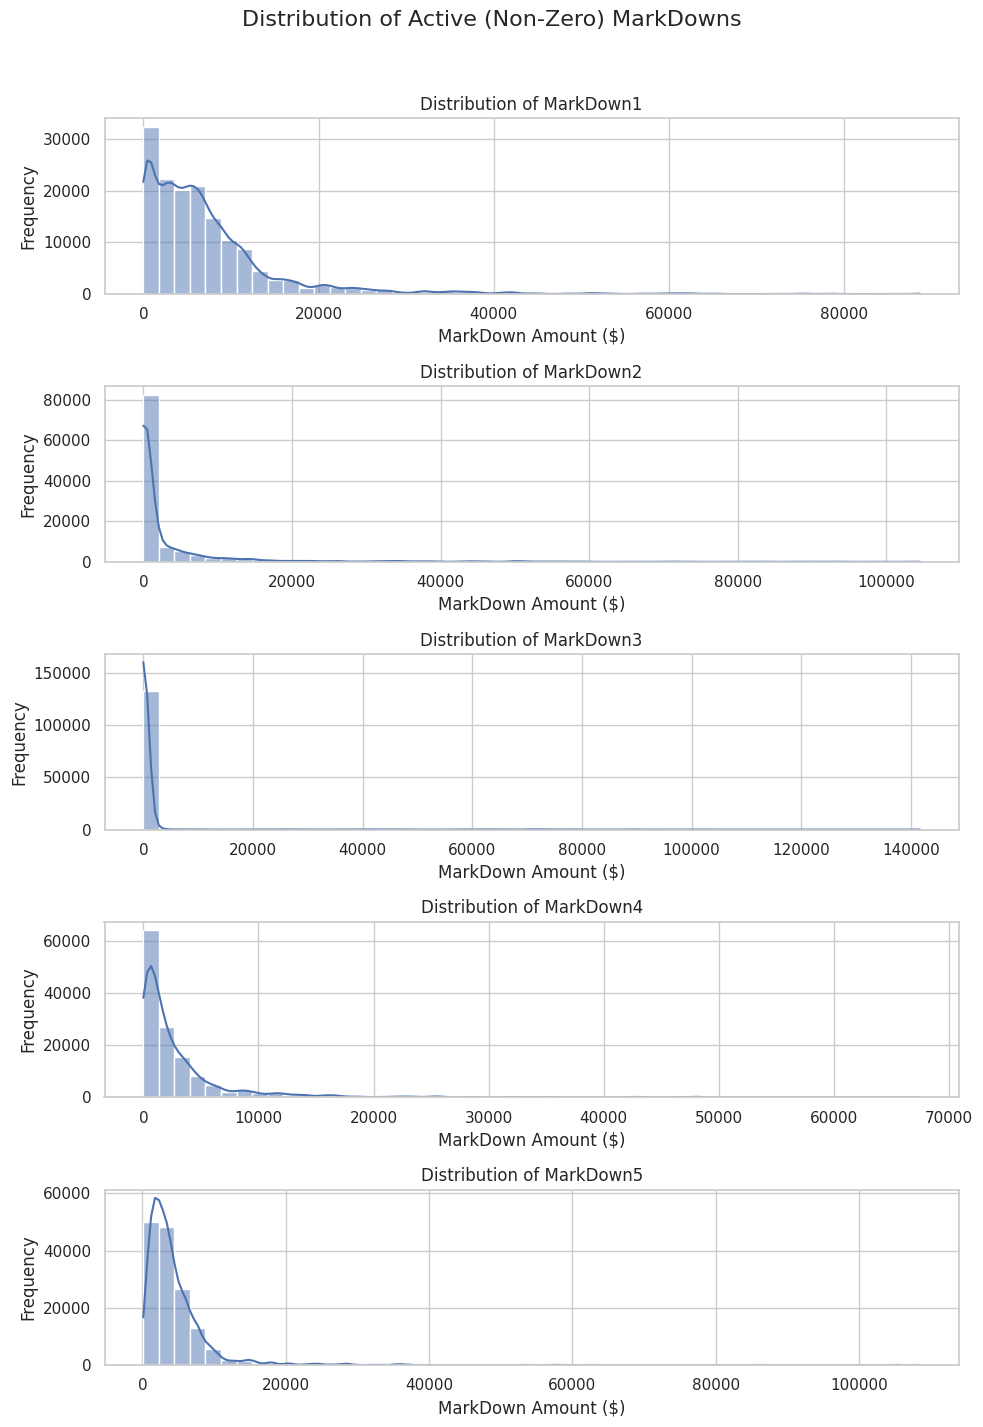

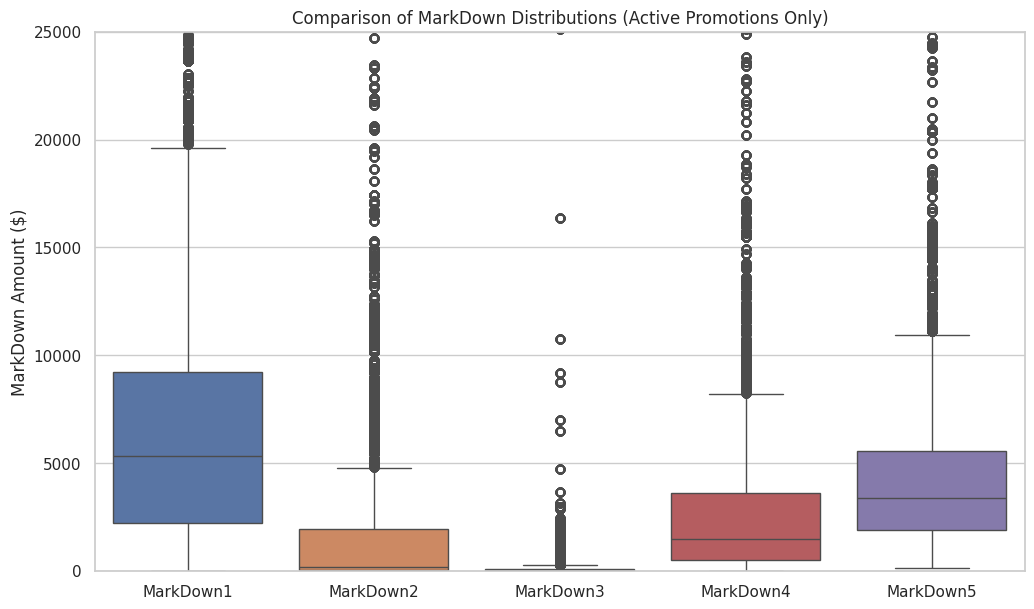

In [ ]:
# --- Step 2: Visualize the Distributions of Non-Zero MarkDowns ---
# Set up the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(markdown_cols), 1, figsize=(10, 15))
fig.suptitle('Distribution of Active (Non-Zero) MarkDowns', fontsize=16)

for i, col in enumerate(markdown_cols):
    # Filter for non-zero values
    non_zero_data = df_w_final[df_w_final[col] > 0][col]
    
    # Create a histogram (distplot) on the i-th subplot
    sns.histplot(non_zero_data, ax=axes[i], kde=True, bins=50)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('MarkDown Amount ($)')
    axes[i].set_ylabel('Frequency')
    # Optional: Use a log scale if the data is heavily skewed
    # axes[i].set_xscale('log') 

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# A box plot is also excellent for comparing them side-by-side
plt.figure(figsize=(12, 7))
# This is a bit tricky, so replace 0 with NaN just for this plot
plot_data = df_w_final[markdown_cols].replace(0, pd.NA)
sns.boxplot(data=plot_data)
plt.title('Comparison of MarkDown Distributions (Active Promotions Only)')
plt.ylabel('MarkDown Amount ($)')
plt.ylim(0, 25000) # Adjust the y-axis limit as needed
plt.show()

In [ ]:
# --- Step 1: Count active markdowns per row ---

# For each markdown column, check if the value is > 0. This creates a boolean DataFrame.
df_w_final['Active_MarkDown_Count'] = (df_w_final[markdown_cols] > 0).sum(axis=1)

# --- Step 2: Analyze the distribution of these counts ---
count_distribution = df_w_final['Active_MarkDown_Count'].value_counts().sort_index()

print("--- Distribution of Concurrently Active MarkDowns per Week ---")
print(count_distribution)

--- Distribution of Concurrently Active MarkDowns per Week ---
Active_MarkDown_Count
0    270138
1       248
2      3916
3      9042
4     42759
5     95467
Name: count, dtype: int64


<Axes: >

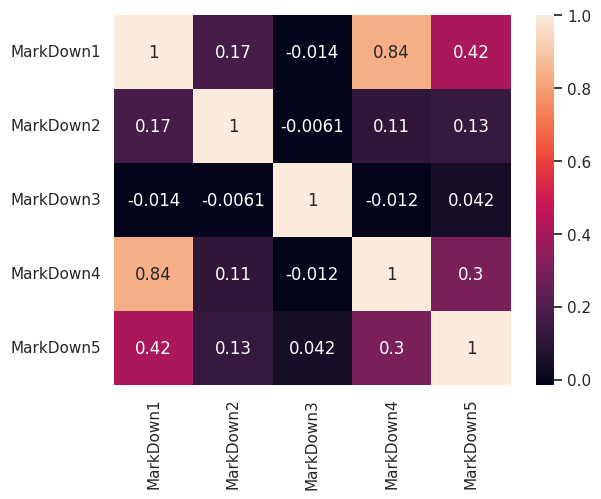

In [21]:
# --- Step 3: Create a co-occurrence heatmap ---

# Create a boolean DataFrame (True if markdown > 0)
markdown_active_df = (df_w_final[markdown_cols] > 0)

# Calculate the co-occurrence matrix using a dot product
correlation_matrix = df_w_final[markdown_cols].corr()
sns.heatmap(correlation_matrix, annot=True)

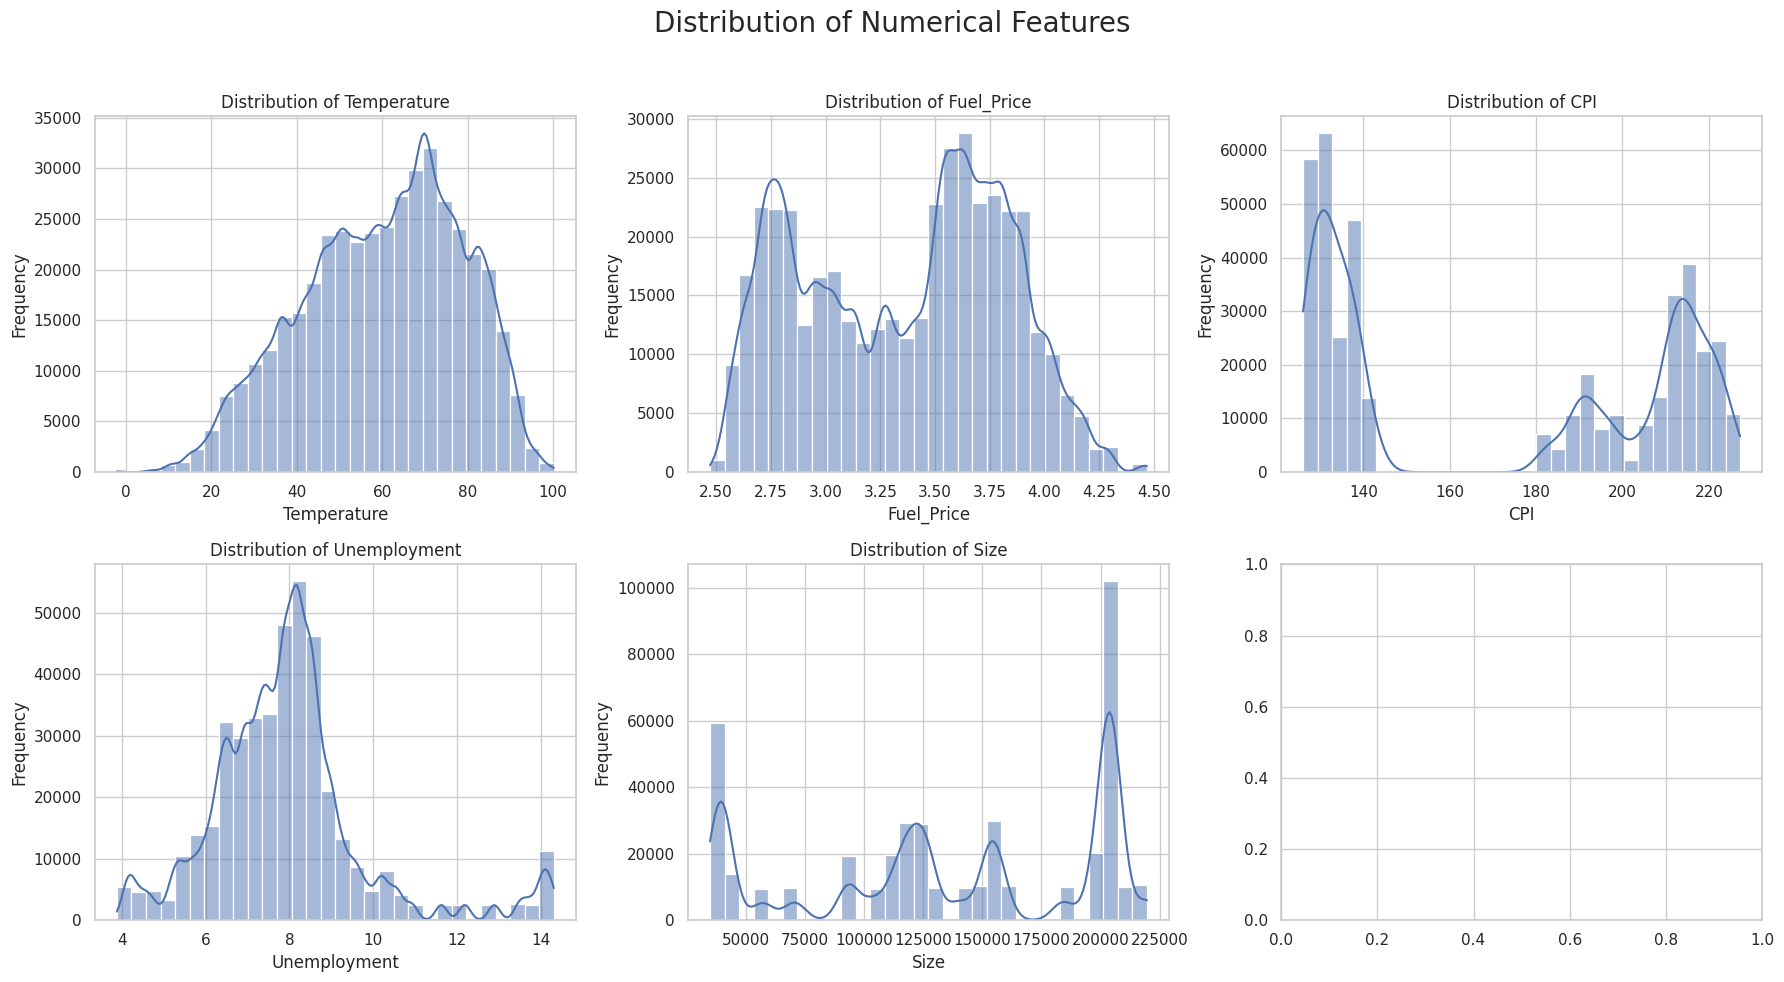

In [33]:
# Set the plotting style.
sns.set_style("whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns).
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=20)

# List of numerical features to plot
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

# Create a histogram for each numerical feature
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.histplot(df_check[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

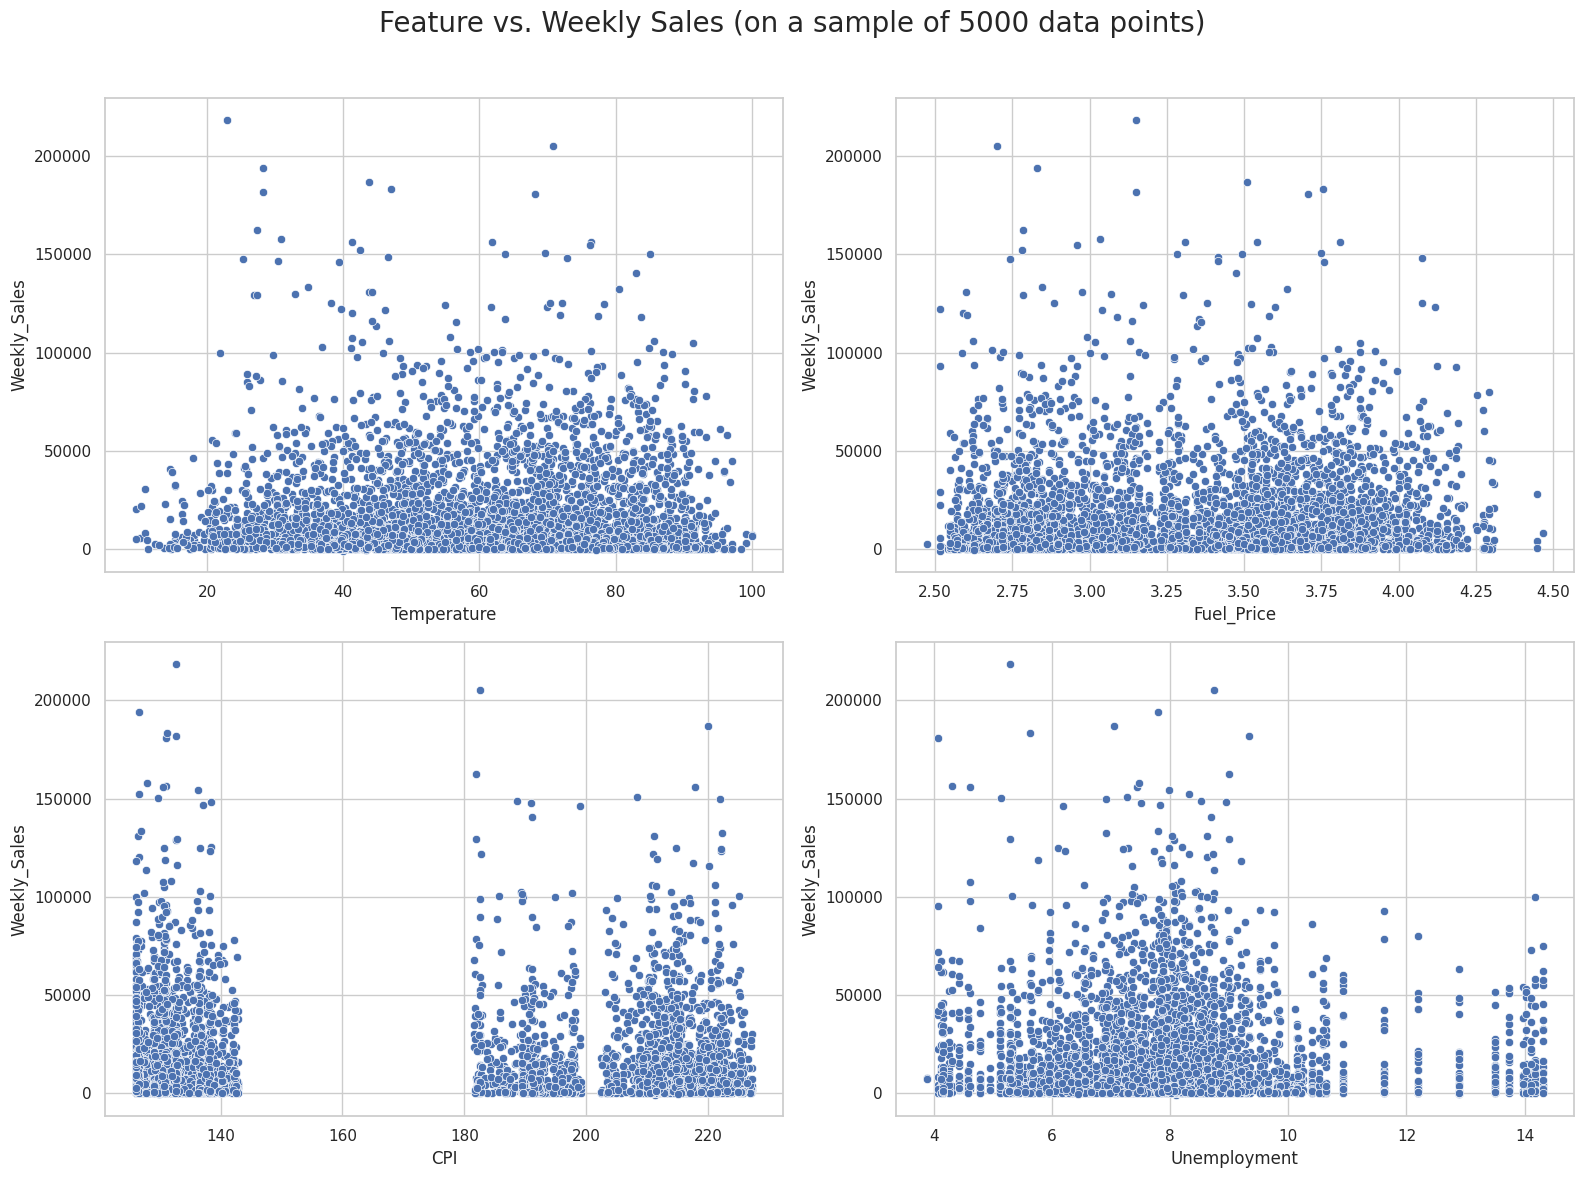

In [34]:
# A scatter plot of the full dataset (>400k points) would be slow and unreadable due to overplotting.
sample_df = df_check.sample(n=5000, random_state=42)

# Create a 2x2 grid for scatter plots.
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature vs. Weekly Sales (on a sample of 5000 data points)', fontsize=20)

# Scatter plots for each feature
sns.scatterplot(data=sample_df, x='Temperature', y='Weekly_Sales', ax=axes[0, 0])
sns.scatterplot(data=sample_df, x='Fuel_Price', y='Weekly_Sales', ax=axes[0, 1])
sns.scatterplot(data=sample_df, x='CPI', y='Weekly_Sales', ax=axes[1, 0])
sns.scatterplot(data=sample_df, x='Unemployment', y='Weekly_Sales', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
# Group by 'Store' and 'Dept', then sum the 'Weekly_Sales' for each group.
store_sales_over_time = df_w_final.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

print("\nStore and Department Sales Over Time:")
print(store_sales_over_time.head())


Store and Department Sales Over Time:
   Store        Date  Weekly_Sales
0      1  2010-02-05    1643690.90
1      1  2010-02-12    1641957.44
2      1  2010-02-19    1611968.17
3      1  2010-02-26    1409727.59
4      1  2010-03-05    1554806.68


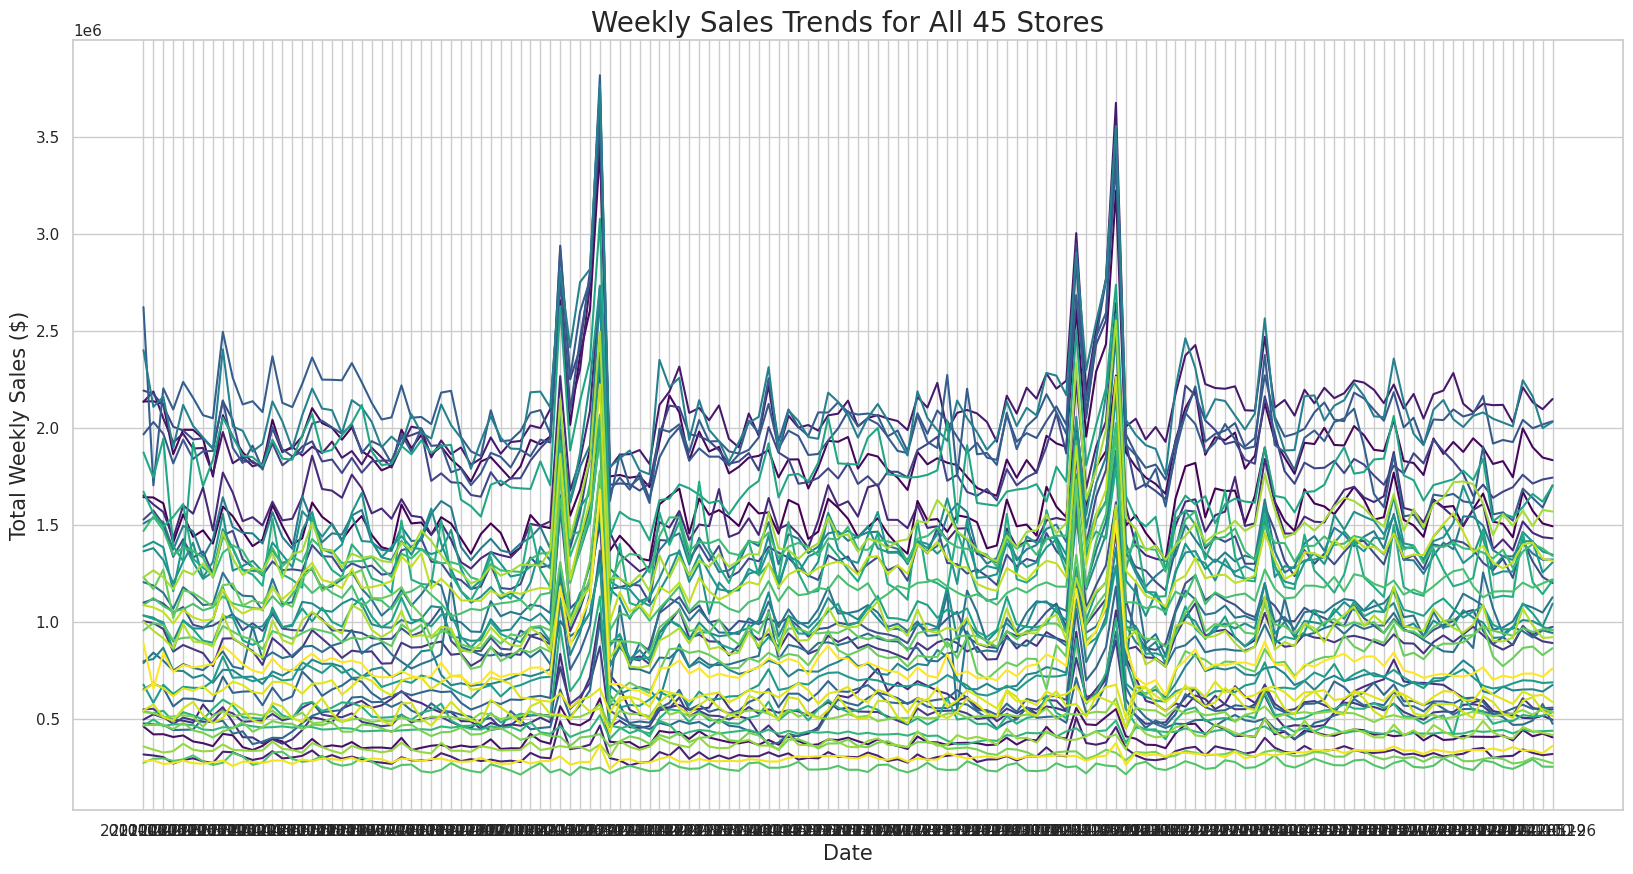

In [8]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a large figure for the plot
plt.figure(figsize=(20, 10))

# Use seaborn's lineplot to draw trends for all stores.
sns.lineplot(data=store_sales_over_time, x='Date', y='Weekly_Sales', hue='Store', palette='viridis', legend=None)

plt.title('Weekly Sales Trends for All 45 Stores', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Weekly Sales ($)', fontsize=15)
plt.show()

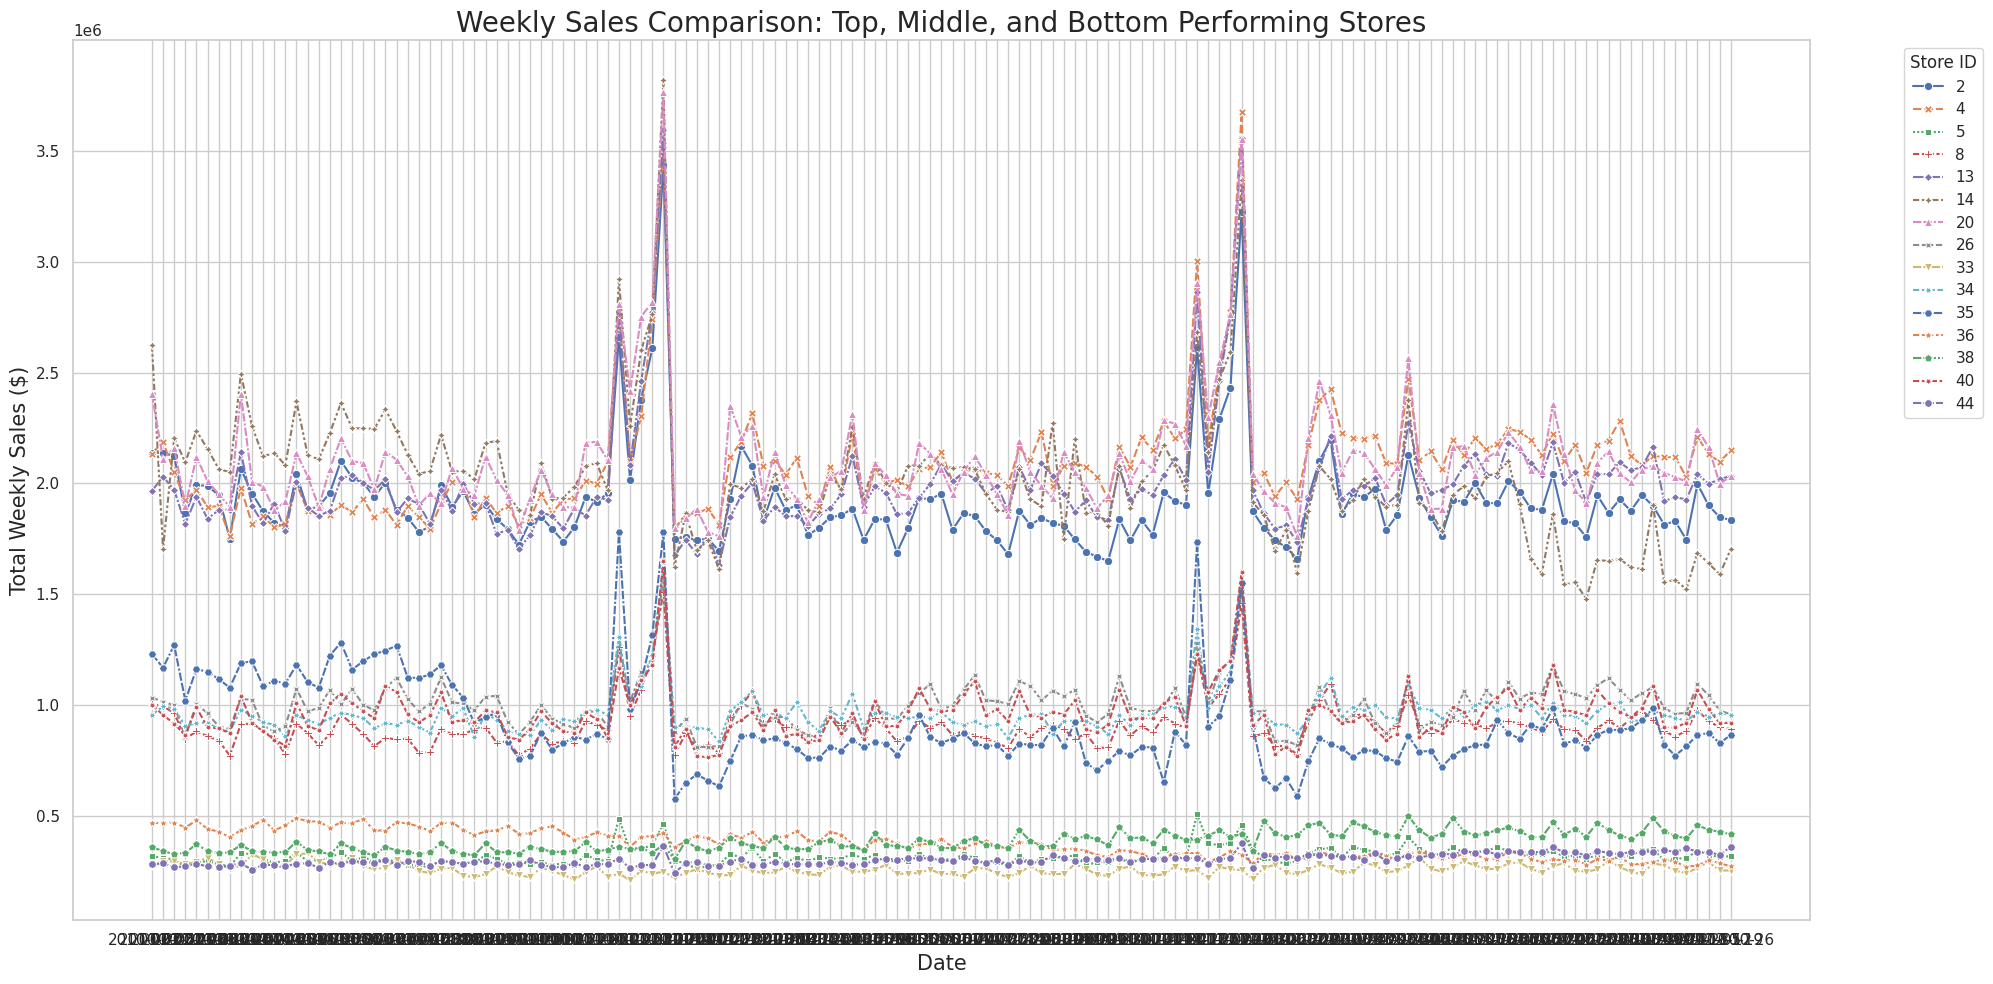

In [9]:
# Calculate the average weekly sales for each store to rank them.
average_store_sales = store_sales_over_time.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

# Indentify the top, middle, and bottom stores based on average sales.
top_stores = average_store_sales.head(5).index
middle_stores = average_store_sales.iloc[21:26].index
bottom_stores = average_store_sales.tail(5).index

# Combine the top, middle, and bottom stores into a single list.
representative_stores = top_stores.union(middle_stores).union(bottom_stores)

# Filter the data to include only the representative stores.
df_rep = store_sales_over_time[store_sales_over_time['Store'].isin(representative_stores)]

# Create the plot for the representative stores.
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_rep, x='Date', y='Weekly_Sales', hue='Store', style='Store', markers=True, palette='deep')

plt.title('Weekly Sales Comparison: Top, Middle, and Bottom Performing Stores', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Weekly Sales ($)', fontsize=15)
# Place the legend outside the plot for better readability.
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

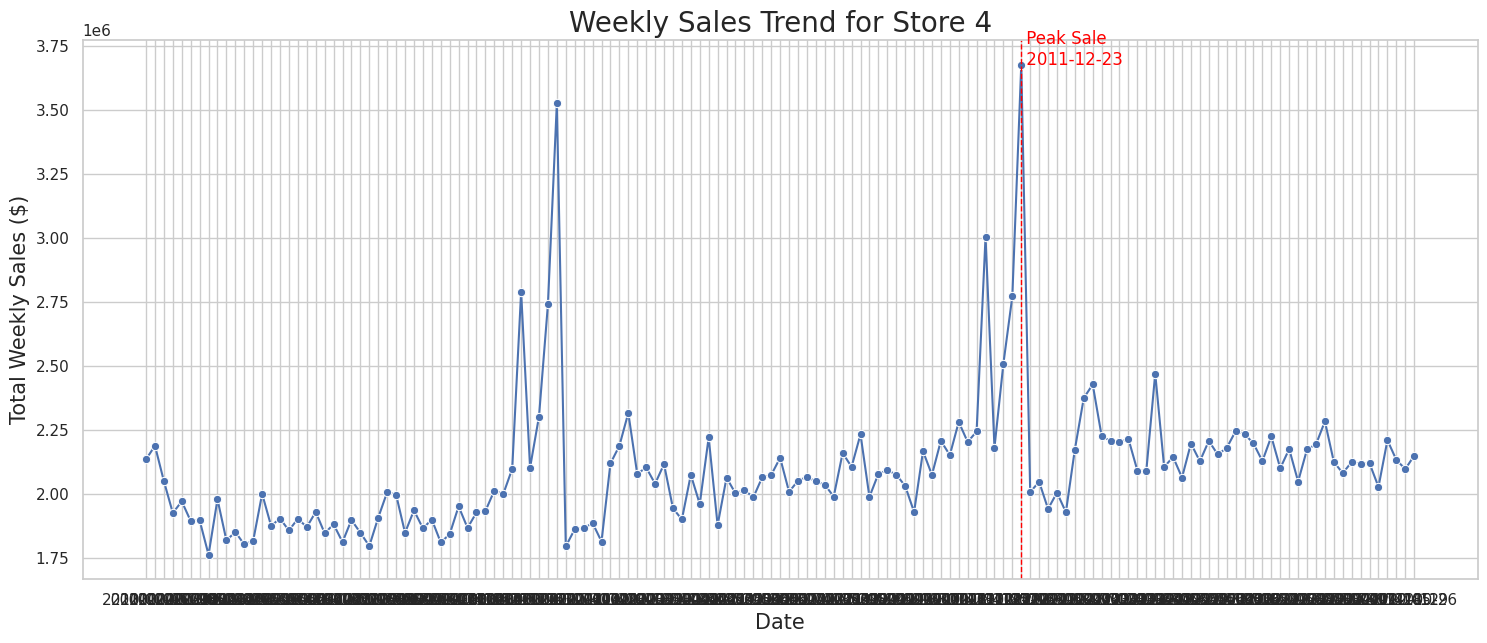

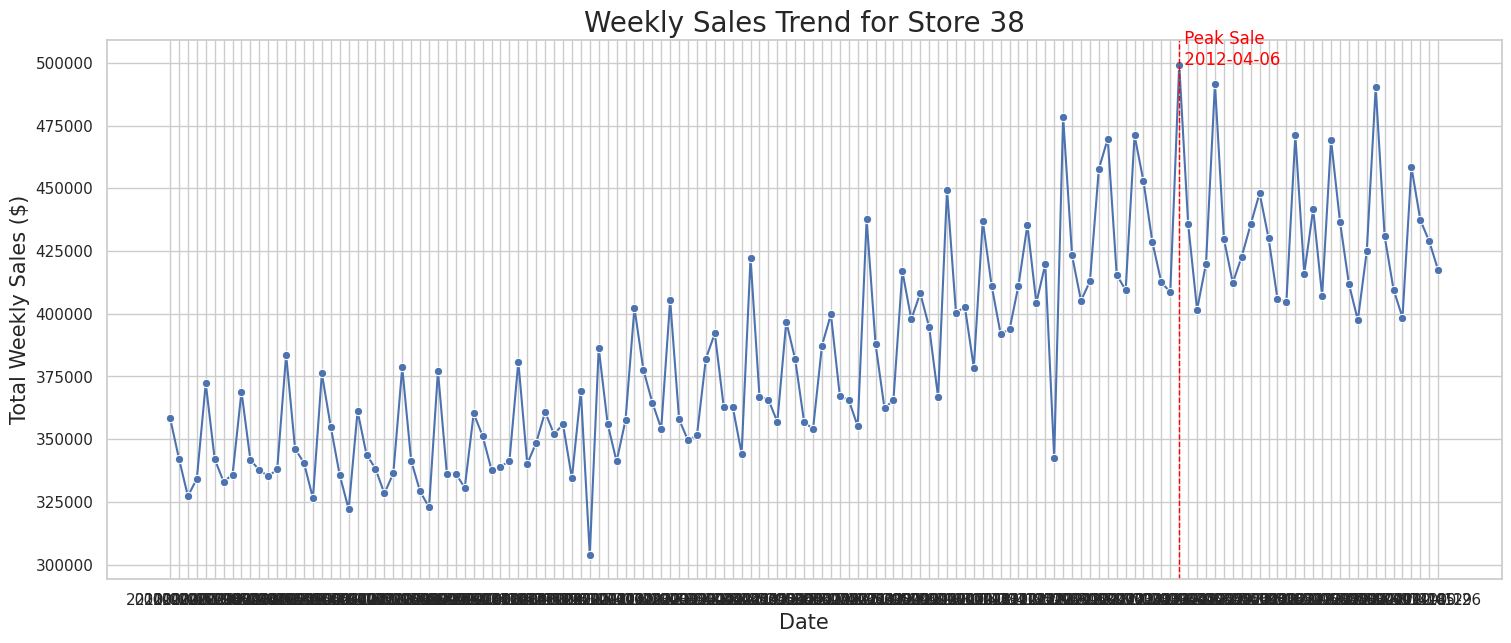

In [14]:
def plot_single_store_sales(store_id):
    """
    Plots the weekly sales trend for a specified store ID.
    
    Args:
    store_id (int): The ID of the store (1-45).
    """
    # Filter the data for the specified store.
    df_single_store = store_sales_over_time[store_sales_over_time['Store'] == store_id]
    
    if df_single_store.empty:
        print(f"Error: No data found for Store ID {store_id}.")
        return
        
    plt.figure(figsize=(18, 7))
    sns.lineplot(data=df_single_store, x='Date', y='Weekly_Sales', marker='o')
    
    # Find the date with the highest sales and annotate it.
    peak_sale = df_single_store.loc[df_single_store['Weekly_Sales'].idxmax()]
    plt.axvline(peak_sale['Date'], color='red', linestyle='--', lw=1)
    # Add a text label for the peak sale date.
    plt.text(peak_sale['Date'], peak_sale['Weekly_Sales'], f" Peak Sale\n {pd.to_datetime(peak_sale['Date']).date()}", color='red')
    
    plt.title(f'Weekly Sales Trend for Store {store_id}', fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Total Weekly Sales ($)', fontsize=15)
    plt.show()


# Analyze one of the top-performing stores
plot_single_store_sales(4)

# Analyze one of the bottom-performing stores 
plot_single_store_sales(38)

## 4. Identify correlated variables

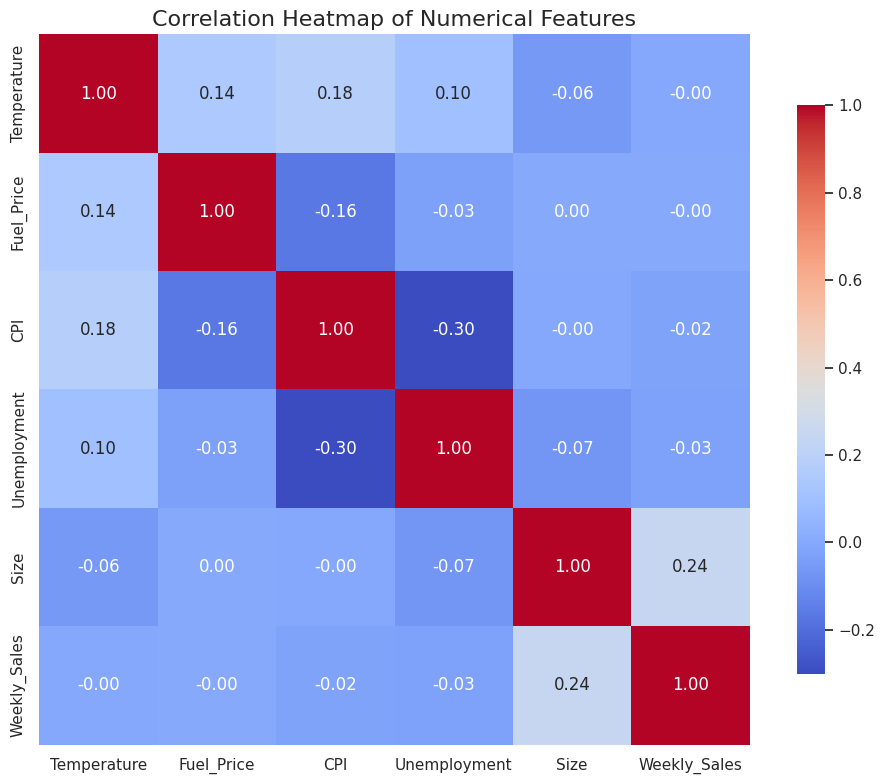

In [35]:
# Select only the numerical columns for the correlation calculation.
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Weekly_Sales']
correlation_matrix = df_check[numerical_cols].corr()

# Create a figure for the heatmap.
plt.figure(figsize=(10, 8))

# Generate the heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


<Axes: >

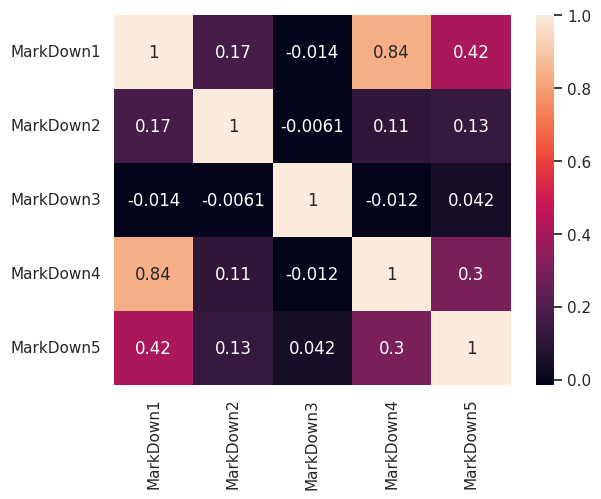

In [36]:
# --- Create a Markdown co-occurrence heatmap ---

# Create a boolean DataFrame (True if markdown > 0)
markdown_active_df = (df_w_final[markdown_cols] > 0)

# Calculate the co-occurrence matrix using a dot product
correlation_matrix = df_w_final[markdown_cols].corr()
sns.heatmap(correlation_matrix, annot=True)

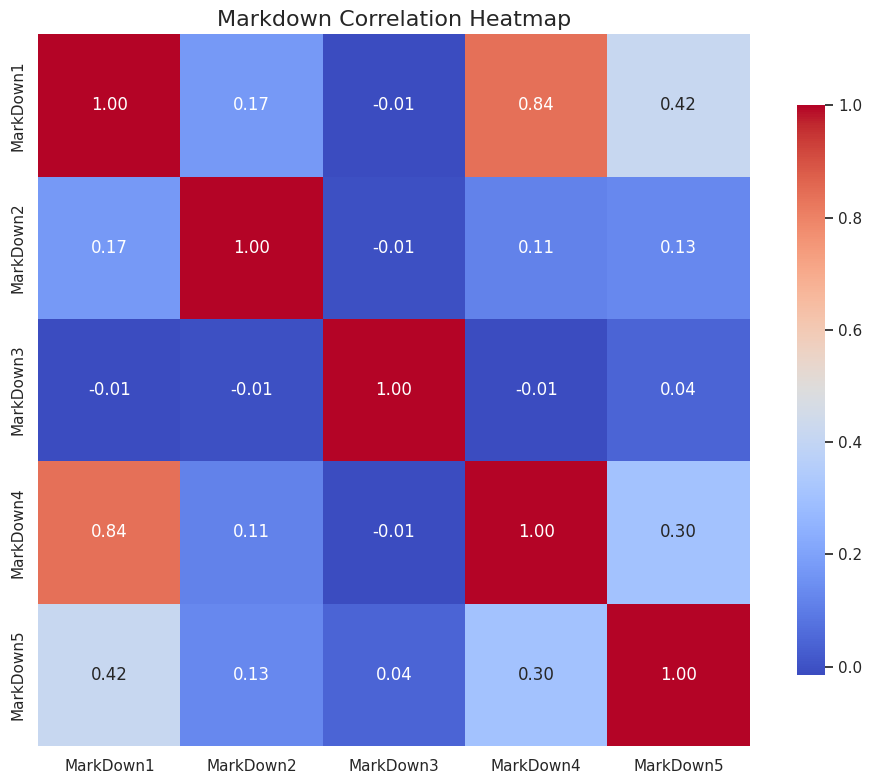

In [37]:
# --- Create Markdown Correlation Heatmap ---
markdown_df = df_w_final[markdown_cols]
# Calculate the correlation matrix for the markdown columns
correlation_matrix = markdown_df.corr()
# Set the plotting style
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Markdown Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

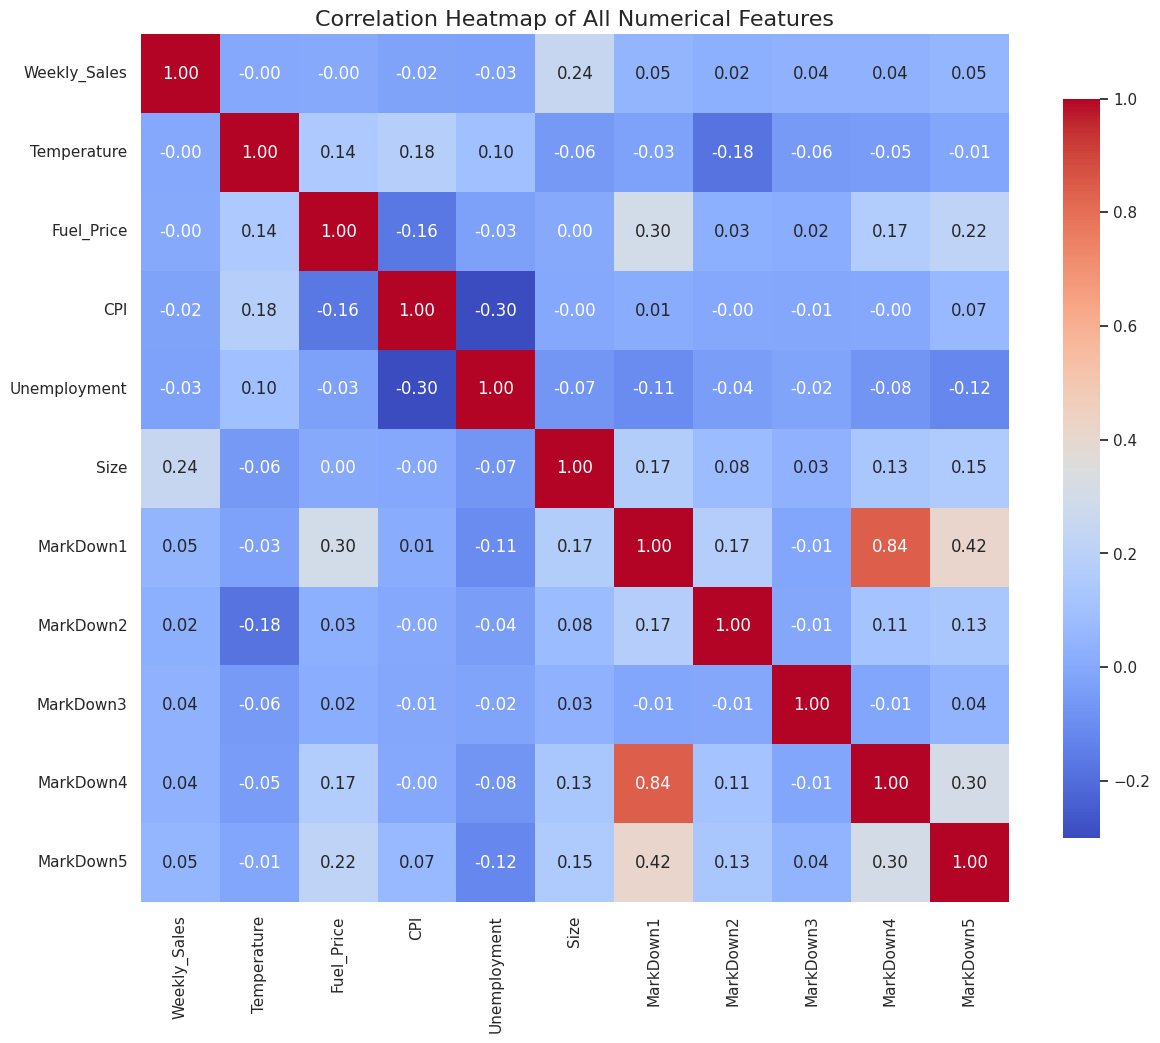

In [15]:
# Select all numerical columns for a comprehensive correlation analysis.
all_numerical_features = [
    'Weekly_Sales', 
    'Temperature', 
    'Fuel_Price', 
    'CPI', 
    'Unemployment', 
    'Size',
    'MarkDown1', 
    'MarkDown2', 
    'MarkDown3', 
    'MarkDown4', 
    'MarkDown5'
]

# Create a new DataFrame with only these columns
df_full_corr = df_w_final[all_numerical_features]

# Calculate the correlation matrix for all numerical features.
correlation_matrix_full = df_full_corr.corr()

# Create a figure for the heatmap.
plt.figure(figsize=(14, 12))
# Generate the heatmap.
sns.heatmap(correlation_matrix_full, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of All Numerical Features', fontsize=16)
plt.show()

## 5. Summary

## Summary: W Store Sales Data Analysis
This analysis of the W Store sales data from 2010-2012 reveals key drivers of sales and provides insights into the company's operational and promotional strategies.

1.  Key Drivers of Weekly Sales:
- Store Size is the Strongest Predictor
- Minimal Linear Impact from Economic Factors
- Negative Sales Indicate Returns

2.  Promotional Strategy Insights:
- Strategic Promotional Bundling
- A Core Promotional Combo
- Independent vs. Clustered Promotions


In [38]:
# Save the cleaned and merged DataFrame to a new CSV file
output_filepath = '/workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/W store sales/cleaned_w_store_sales.csv'
df_w_final.to_csv(output_filepath, index=False)
print(f"\nCleaned W Store Sales DataFrame saved to: {output_filepath}")


Cleaned W Store Sales DataFrame saved to: /workspaces/2025-Phase-2/data-science/1. Analysis and Preprocessing/datasets/W store sales/cleaned_w_store_sales.csv
